<a href="https://colab.research.google.com/github/Alhamdanaaa/PCVK_Ganjil_24-25/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JOBSHEET 11**
## Nama  : Alhamdana Fariz Al Furqaan
## Kelas : TI-3F
## Absen : 03

## 1. Buat notebook baru dan beri nama“Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


##2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

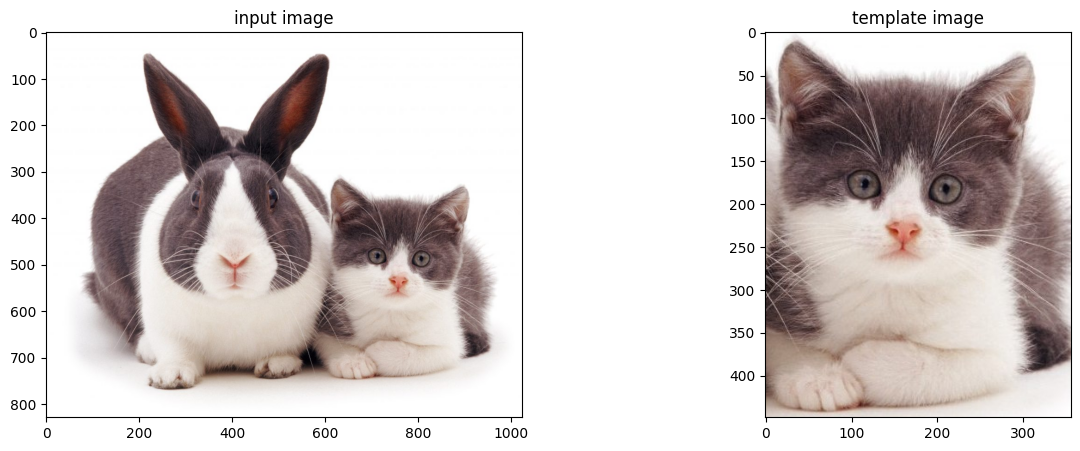

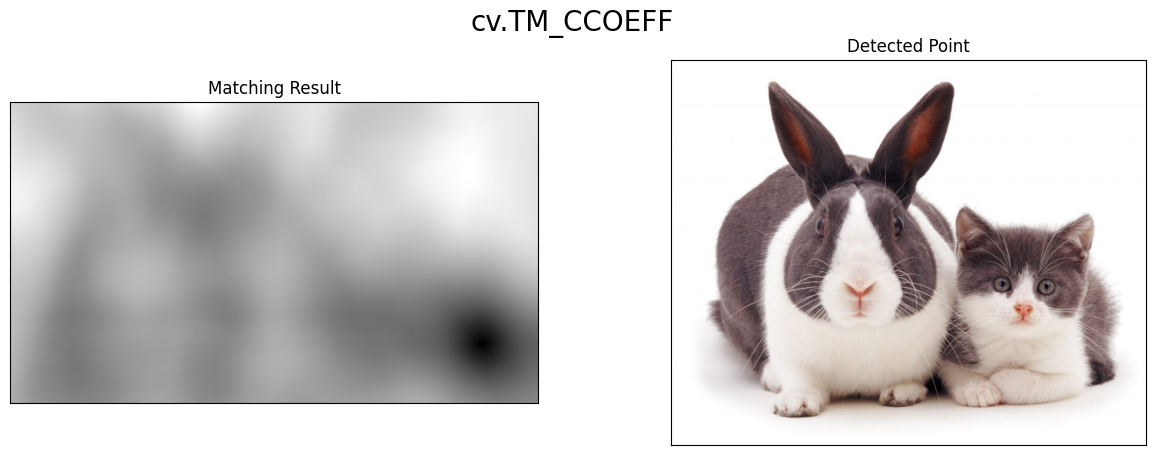

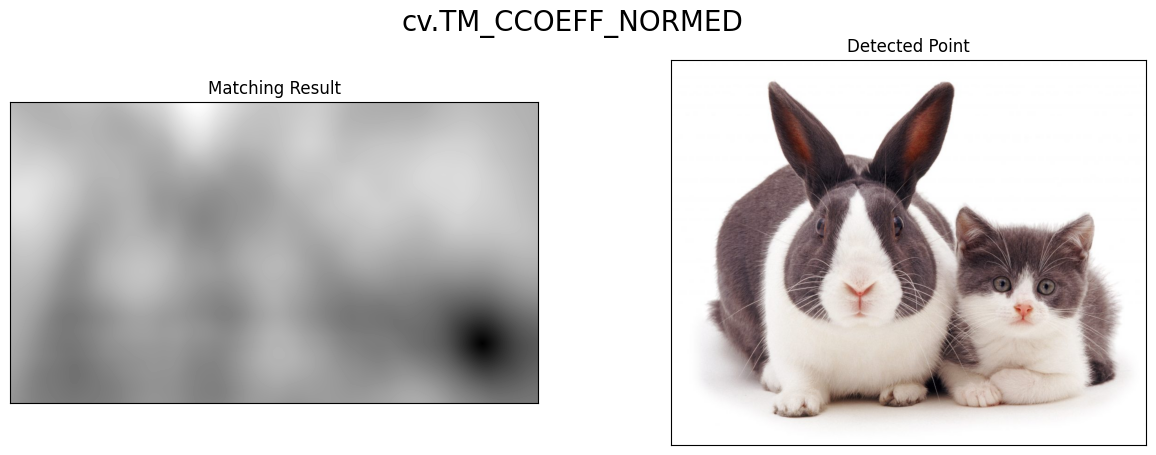

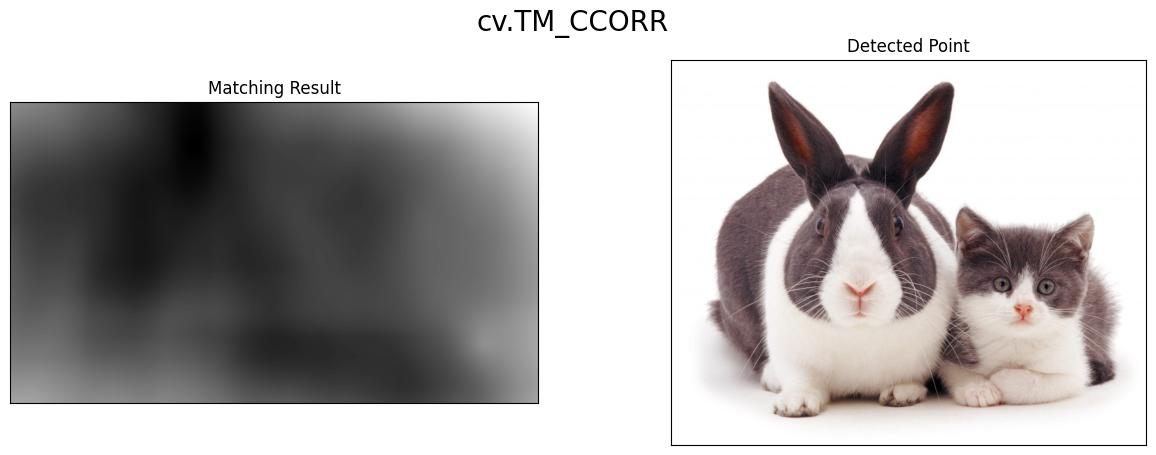

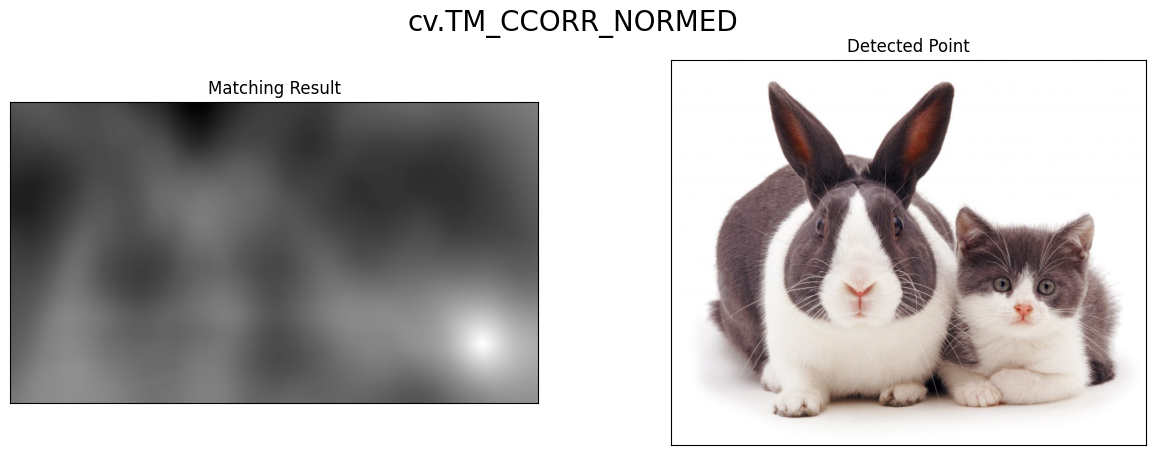

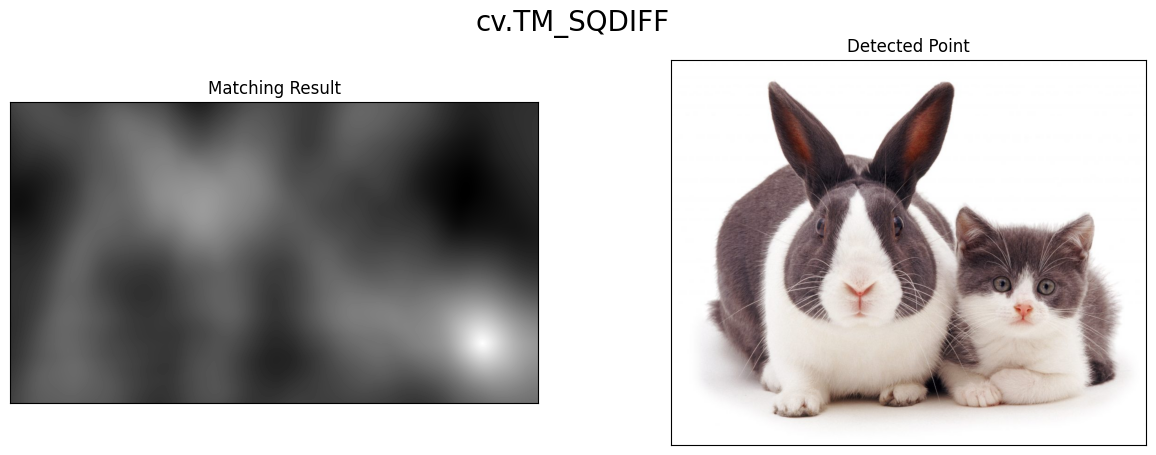

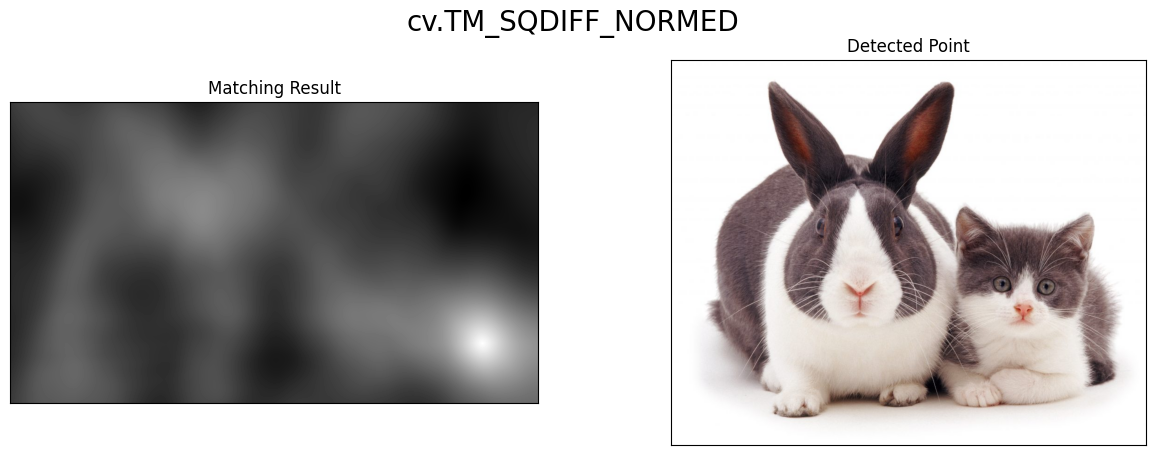

<Figure size 640x480 with 0 Axes>

In [18]:
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

template = cv.imread('/content/drive/MyDrive/PCVK/cat2_templatejpg.jpg')
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

template_width, template_height = template_gray.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

for i,method in enumerate(methods):
    # Apply template matching
    result = cv.matchTemplate(img_gray, template_gray, i)

    # Get the minimum and maximum values and their locations
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

    # For SQDIFF and SQDIFF_NORMED, the minimum value gives the best match
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Determine the bottom right corner of the bounding box
    bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

    # Draw the rectangle on a copy of the img image
    match_img = img.copy()
    cv.rectangle(match_img, top_left, bottom_right, (0, 255, 0), 2)

    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(result,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(method, fontsize=20)
    plt.show()

plt.tight_layout()
plt.show()

## 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template

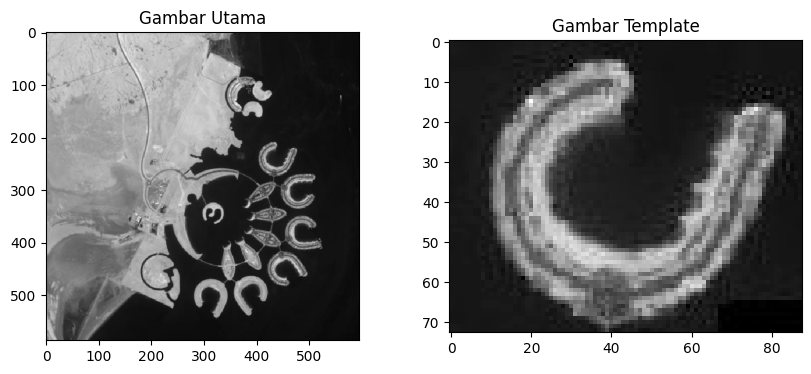

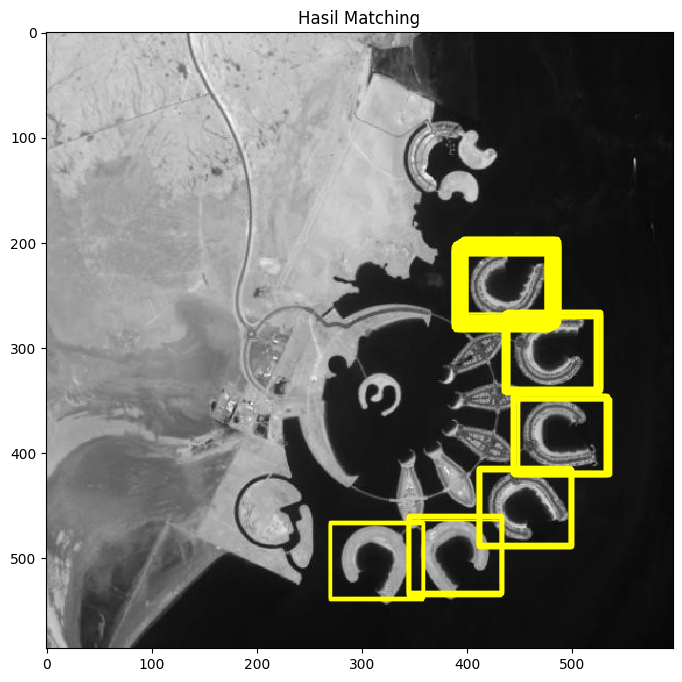

In [8]:
from skimage.feature import match_template

# Memuat gambar utama dan template
main_image = cv.imread('/content/drive/MyDrive/PCVK/bahrain.jpg', 0)  # 0 berarti grayscale
template = cv.imread('/content/drive/MyDrive/PCVK/bahrain-template.jpg', 0)  # 0 berarti grayscale

# Menampilkan gambar utama dan template
f, axarr = plt.subplots(1, 2, figsize=(10, 4))  # Membuat 2 plot untuk gambar utama dan template
axarr[0].imshow(main_image, cmap='gray')
axarr[0].set_title("Gambar Utama")
axarr[1].imshow(template, cmap='gray')
axarr[1].set_title("Gambar Template")

# Menghitung kesamaan antara gambar utama dan template
result = match_template(main_image, template)

# Menetapkan threshold untuk hasil matching
threshold = 0.45
locations = np.where(result >= threshold)

# Menampilkan hasil matching
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(main_image, cmap=plt.cm.gray)

# Mendapatkan dimensi dari template
height, width = template.shape

# Menggambar persegi pada setiap lokasi kecocokan yang ditemukan
for loc in zip(*locations[::-1]):  # Membalik urutan koordinat untuk x, y
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=1)
    ax.add_patch(rect)

plt.title("Hasil Matching")
plt.show()


## 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

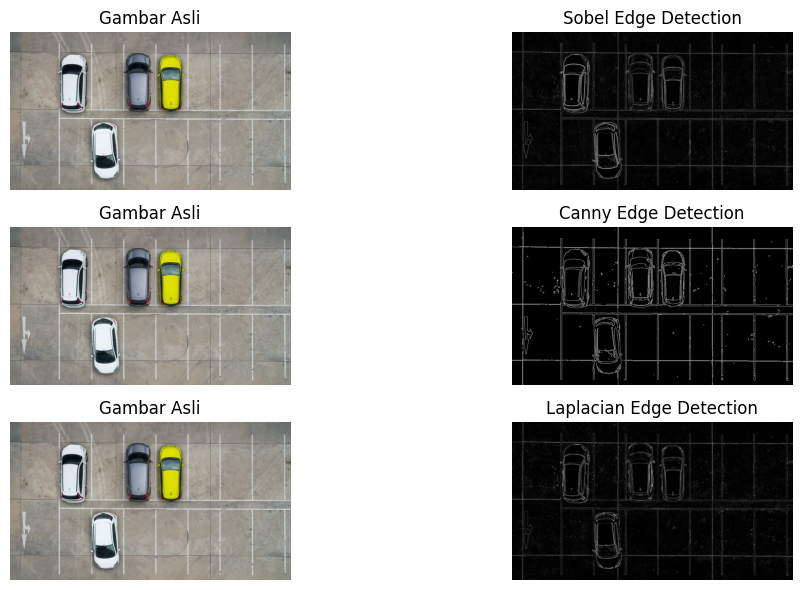

In [18]:
# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/car-park.jpg')
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# 1. Sobel Edge Detection
sobel_x = cv.Sobel(image_gray, cv.CV_64F, 1, 0, ksize=3)  # Deteksi tepi horizontal
sobel_y = cv.Sobel(image_gray, cv.CV_64F, 0, 1, ksize=3)  # Deteksi tepi vertikal
sobel_combined = cv.magnitude(sobel_x, sobel_y)  # Menggabungkan tepi horizontal dan vertikal

# 2. Canny Edge Detection
canny_edges = cv.Canny(image_gray, 100, 200)

# 3. Laplacian Edge Detection
laplacian_edges = cv.Laplacian(image_gray, cv.CV_64F)
laplacian_edges = cv.convertScaleAbs(laplacian_edges)

# Menampilkan hasilnya
plt.figure(figsize=(12, 6))

# Menampilkan Gambar Asli
plt.subplot(3, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan Hasil Sobel Edge Detection
plt.subplot(3, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Menampilkan Hasil Canny Edge Detection
plt.subplot(3, 2, 5)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan Hasil Laplacian Edge Detection
plt.subplot(3, 2, 6)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

# Menampilkan seluruh plot
plt.tight_layout()
plt.show()


## 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg

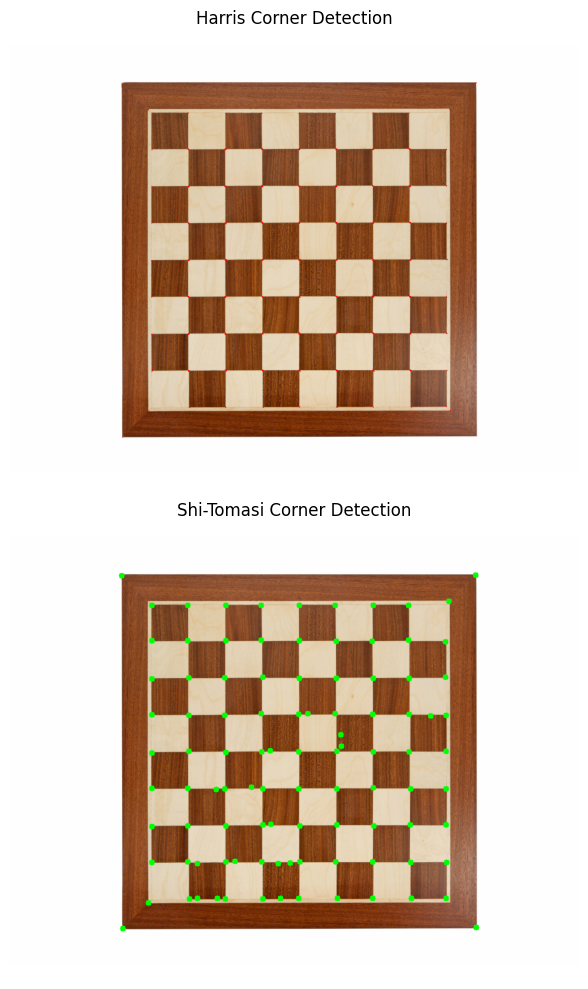

In [19]:
# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/chess-board.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# 1. Harris Corner Detection
# Mengonversi gambar ke float32 dan menerapkan Harris Corner Detection
gray_float = np.float32(gray_image)
harris_corners = cv.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Threshold untuk menampilkan sudut pada gambar
harris_result = image.copy()
harris_result[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Menandai sudut dengan warna merah

# 2. Shi-Tomasi Corner Detection (Good Features to Track)
# Menentukan jumlah sudut yang akan dideteksi
corners = cv.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_result = image.copy()

# Menggambar lingkaran pada setiap sudut yang terdeteksi
if corners is not None:
    for corner in corners:
        x, y = corner.ravel()
        cv.circle(shi_tomasi_result, (int(x), int(y)), 5, (0, 255, 0), -1)  # Menandai sudut dengan warna hijau

# Menampilkan hasilnya
plt.figure(figsize=(20, 10))

# Hasil Harris Corner Detection
plt.subplot(2, 1, 1)
plt.imshow(cv.cvtColor(harris_result, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

# Hasil Shi-Tomasi Corner Detection
plt.subplot(2, 1, 2)
plt.imshow(cv.cvtColor(shi_tomasi_result, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


## 6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg

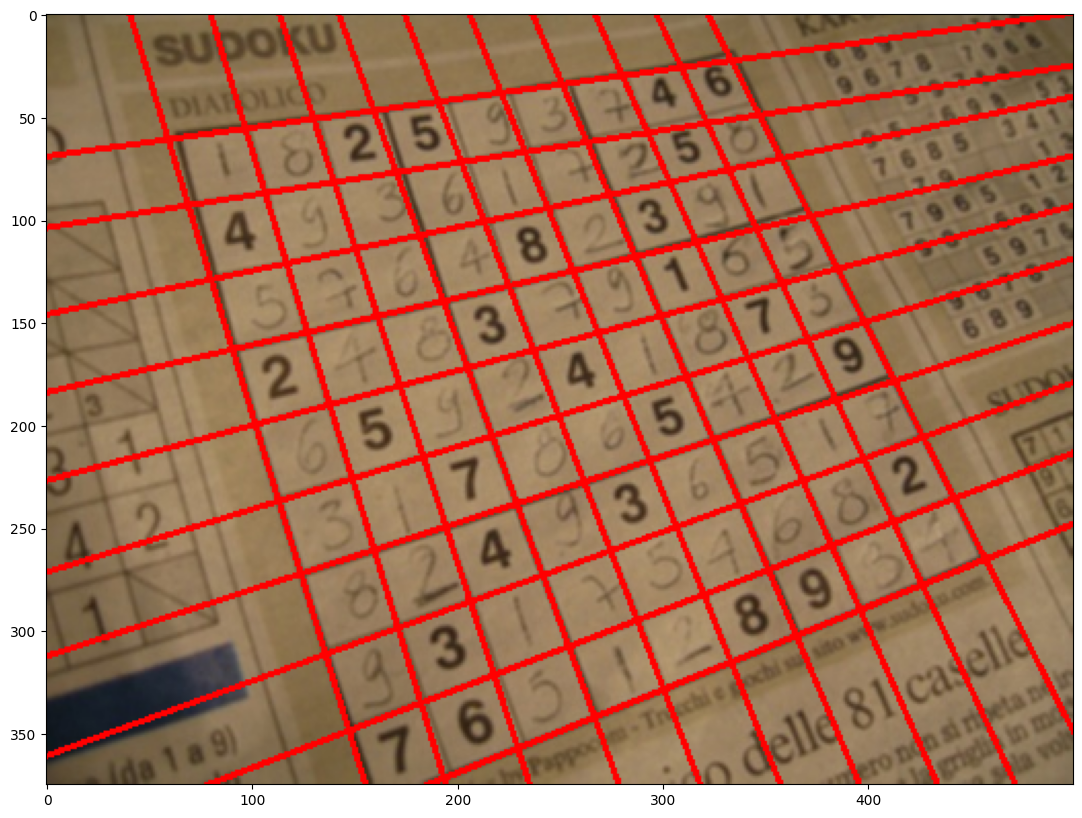

In [31]:
# 1. Membaca gambar dan mengonversinya menjadi grayscale
input_img = cv.imread('/content/drive/MyDrive/PCVK/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# 2. Deteksi tepi menggunakan Canny Edge Detection
edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

# 3. Dilasi dan erosi untuk memperkuat tepi
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# 4. Deteksi garis menggunakan Hough Transform
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

# Memeriksa apakah ada garis yang terdeteksi
if lines is None:
    print('No lines were found')
else:
    # Mengaktifkan filter untuk mengelompokkan garis-garis yang mirip
    filter = True
    if filter:
        rho_threshold = 15  # Threshold jarak antar garis
        theta_threshold = 0.1  # Threshold kemiringan antar garis

        # Mengelompokkan garis yang mirip
        similar_lines = {i: [] for i in range(len(lines))}
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                rho_i, theta_i = lines[i][0]
                rho_j, theta_j = lines[j][0]
                if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                    similar_lines[i].append(j)

        # Mengurutkan garis berdasarkan jumlah kesamaan
        indices = list(range(len(lines)))
        indices.sort(key=lambda x: len(similar_lines[x]), reverse=True)

        # Memfilter garis duplikat atau yang mirip
        line_flags = [True] * len(lines)
        for i in range(len(lines) - 1):
            if not line_flags[indices[i]]:
                continue
            for j in range(i + 1, len(lines)):
                if not line_flags[indices[j]]:
                    continue
                rho_i, theta_i = lines[indices[i]][0]
                rho_j, theta_j = lines[indices[j]][0]
                if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                    line_flags[indices[j]] = False

        # Garis yang sudah difilter berdasarkan flags
        filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]
    else:
        filtered_lines = lines

    # Menggambar garis yang terdeteksi pada gambar asli
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(input_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # 5. Menampilkan hasil akhir
    plt.figure(figsize=(20, 10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
    plt.show()


## 7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg

Text(0.5, 1.0, 'Deteksi Kontur')

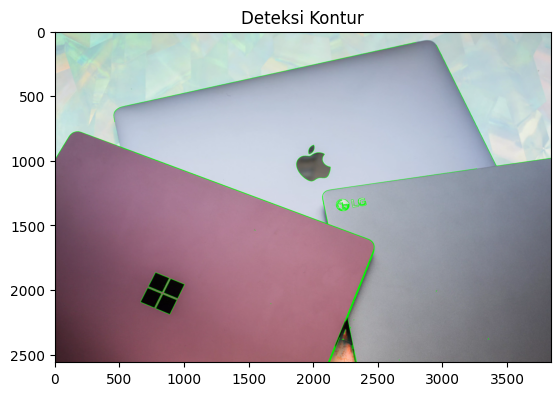

In [30]:
# Memuat gambar dan mengonversinya menjadi grayscale
input_img = cv.imread('/content/drive/MyDrive/PCVK/laptop.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# 1. Mengubah citra menjadi biner dengan menggunakan Canny Edge Detection
edges = cv.Canny(img_gray, 100, 200)

# 2. Menemukan kontur menggunakan fungsi findContours()
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# 3. Menggambar kontur pada gambar asli
contour_img = input_img.copy()
cv.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # Menggambar kontur dengan warna hijau

plt.imshow(cv.cvtColor(contour_img, cv.COLOR_BGR2RGB))
plt.title('Deteksi Kontur')

## Pengayaan Materi KTP

### 1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

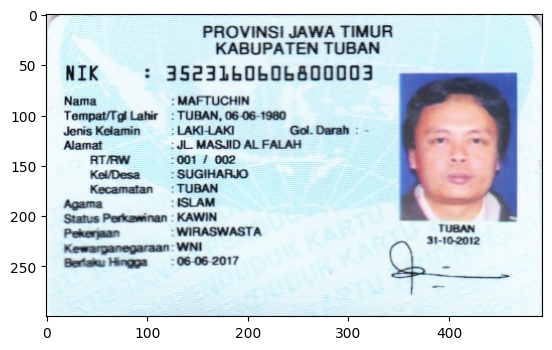

In [33]:
img = cv.imread('/content/drive/MyDrive/PCVK/ktp4.png')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

### 2. Muat 2 library berikut sebagai tahapan persiapan

In [2]:
import cv2
import os

### 3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [14]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/ktp_dataset"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

### 4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi


In [15]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

### 5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [16]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

168.0 (300, 493)


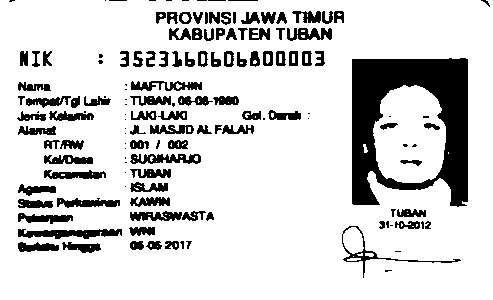

In [18]:
from google.colab.patches import cv2_imshow
cv2_imshow(bw)

### 6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

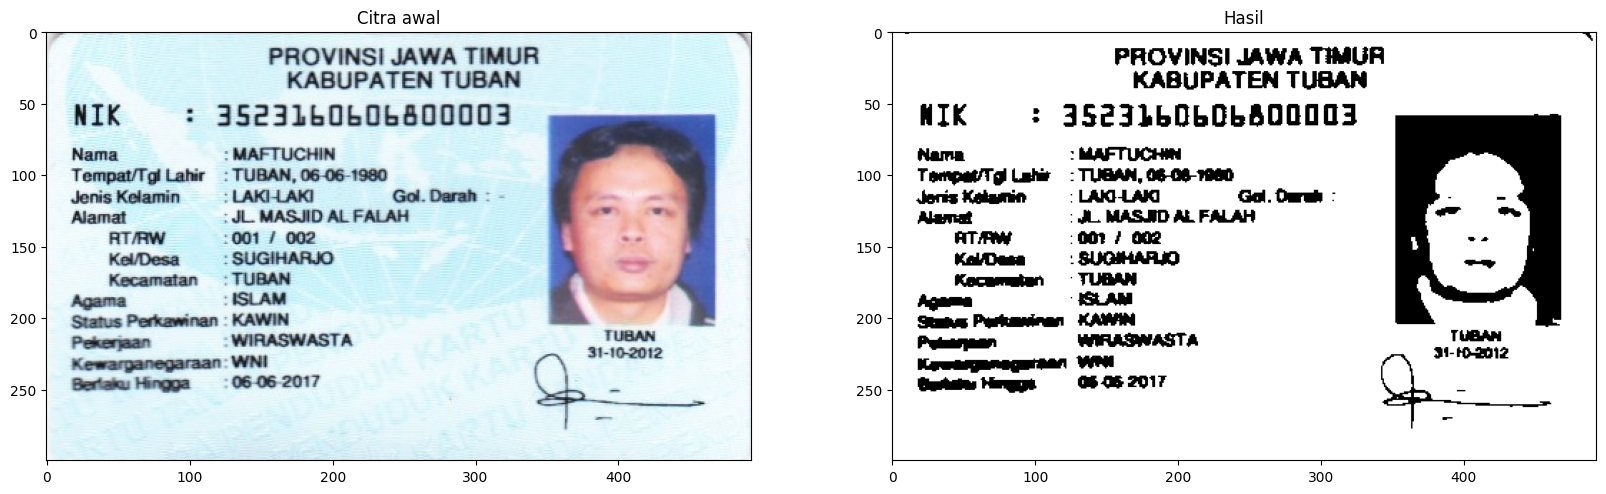

In [19]:
# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1, 2, figsize=(20, 10))
# Menampilkan citra awal (gambar asli)
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title('Citra awal')

# Menampilkan hasil deteksi tepi (gambar hitam putih)
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title('Hasil')

plt.show()

### 7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

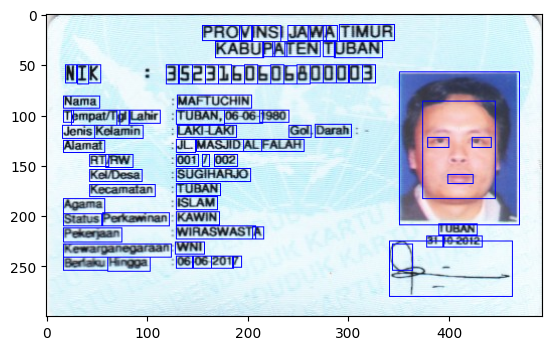

In [20]:
# Membaca gambar
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/ktp4.png')

# Melakukan Gaussian Blur untuk mengurangi noise
blurred_image = cv.GaussianBlur(ktp_image, (5, 5), 0.5)

# Konversi gambar menjadi grayscale
gray_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)

# Binerisasi menggunakan thresholding Otsu
_, binary_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Operasi morfologi erosi dengan elemen struktur yang sedikit lebih besar
eroded_image = cv.erode(binary_image, cv.getStructuringElement(cv.MORPH_RECT, (2, 2)))

# Ekstraksi kontur dari gambar erosi
contours, _ = cv.findContours(eroded_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Looping untuk menyeleksi kontur berdasarkan ukuran dan rasio
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv.rectangle(ktp_image, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)

# Konversi gambar ke RGB untuk ditampilkan dengan plt
ktp_rgb_image = cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB)

# Menampilkan gambar hasil deteksi kontur
plt.imshow(ktp_rgb_image)
plt.show()
